In [1]:
#Depencies + extras in case
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
import sklearn as skl
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import seaborn as sns
import os


In [2]:
scaled_df = pd.read_csv('Resources/scaled.csv')
scaled_df

,carat,depth,table,price,cut_b'Good',cut_b'Ideal',cut_b'Premium',cut_b'Very Good',color_b'E',color_b'F',...,color_b'H',color_b'I',color_b'J',clarity_b'IF',clarity_b'SI1',clarity_b'SI2',clarity_b'VS1',clarity_b'VS2',clarity_b'VVS1',clarity_b'VVS2'
0,-1.405572,-0.156729,-1.120720,-1.038223,-0.342592,1.305138,-0.566777,-0.568675,2.224396,-0.462318,...,-0.439985,-0.359811,-0.263711,-0.172747,-0.574252,2.004444,-0.421931,-0.510935,-0.254255,-0.308898
1,-1.447307,-1.265593,1.490024,-1.038223,-0.342592,-0.766202,1.764362,-0.568675,2.224396,-0.462318,...,-0.439985,-0.359811,-0.263711,-0.172747,1.741395,-0.498891,-0.421931,-0.510935,-0.254255,-0.308898
2,-1.405572,-3.157185,3.230521,-1.037985,2.918924,-0.766202,-0.566777,-0.568675,2.224396,-0.462318,...,-0.439985,-0.359811,-0.263711,-0.172747,-0.574252,-0.498891,2.370058,-0.510935,-0.254255,-0.308898
3,-1.280367,0.430317,0.184652,-1.036319,-0.342592,-0.766202,1.764362,-0.568675,-0.449560,-0.462318,...,-0.439985,2.779237,-0.263711,-0.172747,-0.574252,-0.498891,-0.421931,1.957197,-0.254255,-0.308898
4,-1.238632,1.017363,0.184652,-1.036081,2.918924,-0.766202,-0.566777,-0.568675,-0.449560,-0.462318,...,-0.439985,-0.359811,3.792031,-0.172747,-0.574252,2.004444,-0.421931,-0.510935,-0.254255,-0.308898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39751,-0.383065,-0.613320,-0.250472,-0.459629,-0.342592,1.305138,-0.566777,-0.568675,-0.449560,-0.462318,...,-0.439985,-0.359811,-0.263711,-0.172747,1.741395,-0.498891,-0.421931,-0.510935,-0.254255,-0.308898
39752,-0.383065,0.886908,-1.120720,-0.459629,2.918924,-0.766202,-0.566777,-0.568675,-0.449560,-0.462318,...,-0.439985,-0.359811,-0.263711,-0.172747,1.741395,-0.498891,-0.421931,-0.510935,-0.254255,-0.308898
39753,-0.424800,0.691227,1.054900,-0.459629,-0.342592,-0.766202,-0.566777,1.758473,-0.449560,-0.462318,...,-0.439985,-0.359811,-0.263711,-0.172747,1.741395,-0.498891,-0.421931,-0.510935,-0.254255,-0.308898
39754,-0.090921,-0.482865,0.184652,-0.459629,-0.342592,-0.766202,1.764362,-0.568675,-0.449560,-0.462318,...,2.272803,-0.359811,-0.263711,-0.172747,-0.574252,2.004444,-0.421931,-0.510935,-0.254255,-0.308898


In [3]:
# double checking for null values
scaled_df.dropna()
print(scaled_df.isnull().sum())
scaled_df.info()

carat               0
depth               0
table               0
price               0
cut_b'Good'         0
cut_b'Ideal'        0
cut_b'Premium'      0
cut_b'Very Good'    0
color_b'E'          0
color_b'F'          0
color_b'G'          0
color_b'H'          0
color_b'I'          0
color_b'J'          0
clarity_b'IF'       0
clarity_b'SI1'      0
clarity_b'SI2'      0
clarity_b'VS1'      0
clarity_b'VS2'      0
clarity_b'VVS1'     0
clarity_b'VVS2'     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39756 entries, 0 to 39755
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carat             39756 non-null  float64
 1   depth             39756 non-null  float64
 2   table             39756 non-null  float64
 3   price             39756 non-null  float64
 4   cut_b'Good'       39756 non-null  float64
 5   cut_b'Ideal'      39756 non-null  float64
 6   cut_b'Premium'    39756 non-null  f

# Linear Regression Model


### Create Y and x matrices

In [4]:
X = scaled_df.drop(columns=['price'])
y= scaled_df['price']


In [5]:
X.shape,y.shape

((39756, 20), (39756,))

# Splitting the data

In [6]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size= 0.20)

### Reviewing our data's dimensions after split

In [7]:
# for x
X_train.shape,X_test.shape

((31804, 20), (7952, 20))

In [8]:
# for y
y_train.shape,y_test.shape

((31804,), (7952,))

## The Model

In [9]:
#dependencies
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

creating and defining the Lin_regres model

In [10]:
model = linear_model.LinearRegression()

Building training model

In [11]:
model.fit(X_train, y_train)

LinearRegression()

applying trained model on our test dataset

In [12]:
y_pred = model.predict(X_test)

Perfomance test to see how our model is perfoming so far

In [13]:
print('Coefficients:',model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error(MSE): %.2f'
      % mean_squared_error(y_test,y_pred))
print('Coefficient of Determination (R^2): %.2f'
      % r2_score(y_test,y_pred))

Coefficients: [ 1.04800162 -0.01331726 -0.01686196  0.03803016  0.09483733  0.06422302
  0.07020698 -0.01587754 -0.0231132  -0.05171548 -0.09796752 -0.12086617
 -0.14490019  0.23325495  0.37037604  0.25200708  0.39665191  0.41392549
  0.30485224  0.34958165]
Intercept: 0.00041028354155236215
Mean Squared Error(MSE): 0.09
Coefficient of Determination (R^2): 0.91


# 

Some plots to show how a couple of the features have a direct effect on the price 

In [14]:
#setting up for the plot 
diamond_flag = (scaled_df['carat'] >= 0.80) & (scaled_df['carat'] <= 0.99)
diamonds_sml = scaled_df.loc[diamond_flag,:]


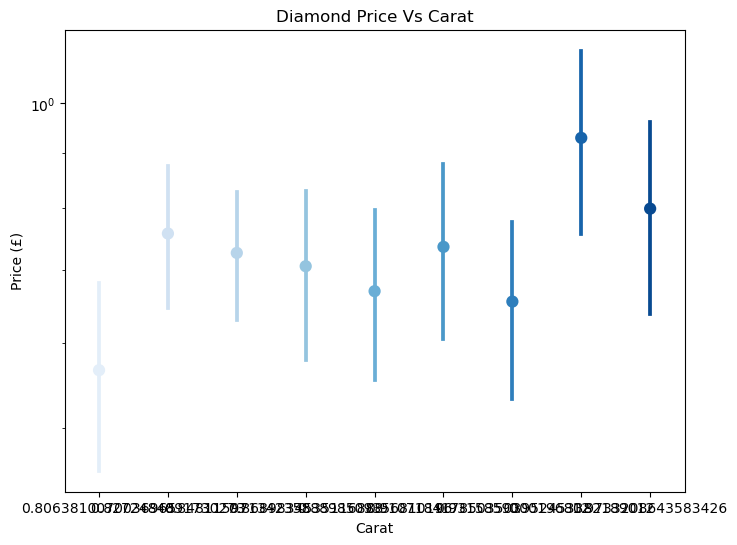

In [15]:
#Price VS Carat plot
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = diamonds_sml, x = 'carat', y = 'price',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Diamond Price Vs Carat')
plt.ylabel('Price (£)')
plt.xlabel('Carat')
plt.yscale('log')
#plt.yticks([3e3, 4e3, 5e3,6e3,7e3], ['3000', '4000', '5000','6000','7000'])
ax.set_yticklabels([],minor = True)
plt.show();

More Carats in a diamond mean Higher Price 

c:\Users\clair\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

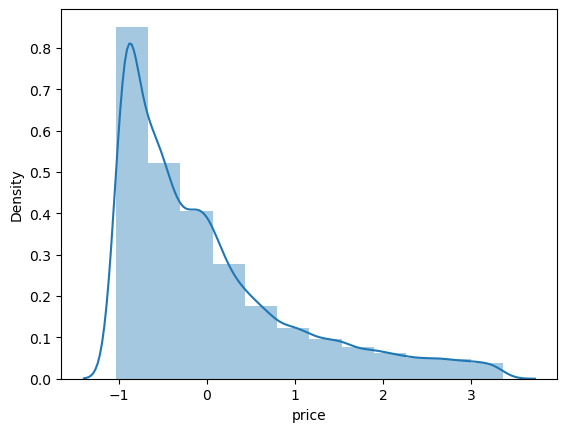

In [16]:
sns.distplot(scaled_df['price'], bins=12, kde=True, rug=False)

Density seems to have less effect on the price especially in comparison to the effect of carats on price.